# Decompose HSC observed dual AGN

This notebook requires standard python libraries and the publicly available packages on github:
See https://github.com/dartoon/galight/blob/master/requirements.txt

This notebook has been tested with galight ==  0.1.6

For more information, please contact me: dingxuheng@126.com

This notebook is almost identical to the 'galight_HSC_QSO.ipynb', only that two point source are considerred.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits

#Data is available at: #Data is available at: https://drive.google.com/file/d/1Axwo-aD5yFrkuHIlYBsQ8ma1nHRpcAHg/view?usp=sharing
fitsFile = pyfits.open('../example_files/HSC/dual_QSO/141637.44+003352.2_HSC-I.fits')

#Load the fov image data:
fov_image = fitsFile[1].data # check the back grounp

#Derive the header informaion, might be used to obtain the pixel scale and the exposure time.
header = fitsFile[1].header # if target position is add in WCS, the header should have the wcs information, i.e. header['EXPTIME']

#Derive the fov noise level map:
err_data= fitsFile[3].data ** 0.5

#Calculate the zeropoint for HSC filters:
file_header0 = fitsFile[0].header
FLUXMAG0 = file_header0['FLUXMAG0']
zp =  2.5 * np.log10(FLUXMAG0)   # This is something Xuheng can't make sure.

#Load the PSF data:
PSF = pyfits.getdata('../example_files/HSC/dual_QSO/141637.44+003352.2_HSC-I_psf.fits')

Estimating the background light ... ... ...


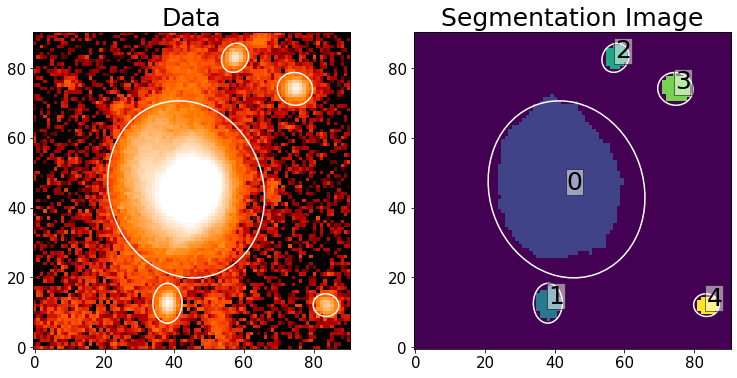

label     xcentroid          ycentroid      ...     kron_flux      kron_fluxerr
                                            ...                                
----- ------------------ ------------------ ... ------------------ ------------
    3 38.030784725523915 12.586077464478063 ...  65.55874418770782          nan
    1  83.51678560281283 12.039270193574506 ... 20.830903775299713          nan
    5   43.3836084416962  45.26437928264396 ... 2941.0977057343566          nan
    4  74.62195455601767   74.1060718943971 ... 52.849002884981985          nan
    2  57.41707320201926  83.02381781728016 ...  41.44439867122244          nan
Input directly the a obj that used to create MASK, use space between each id:
2 4
The data_process is ready to go to pass to FittingSpecify!


In [2]:
from galight.data_process import DataProcess
image_RA = 214.156021
image_DEC = 0.564521
data_process = DataProcess(fov_image = fov_image, fov_noise_map = err_data, target_pos = [image_RA, image_DEC],
                           pos_type = 'wcs', header = header,
                          rm_bkglight = True, if_plot=False, zp = zp)

#Generate the fitting materials
data_process.generate_target_materials(radius=45, create_mask = True, nsigma=2.8,
                                      exp_sz= 1.2, npixels = 15, if_plot=False)

#Manually input the PSF:
data_process.PSF_list = [PSF]

#Check if all the materials is given, if so to pass to the next step.
data_process.checkout() #Check if all the materials is known.

The settings for the fitting is done. Ready to pass to FittingProcess. 
  However, please make updates manullay if needed.


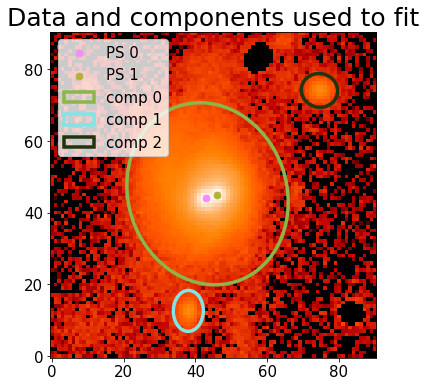

In [3]:
#%%Start to produce the class and params for lens fitting.
from galight.fitting_specify import FittingSpecify
fit_sepc = FittingSpecify(data_process)
fit_sepc.prepare_fitting_seq(point_source_num = 2) #point_source_num =2 for dual AGN.

#Plot the initial settings for fittings. 
fit_sepc.plot_fitting_sets()

fit_sepc.build_fitting_seq()

Computing the PSO ...
10
20
30
40
50
Max iteration reached! Stopping.
-10.964806844968084 reduced X^2 of best position
-44747.37673431475 logL
8162.0 effective number of data points
[] lens result
[] source result
[{'amp': 1, 'R_sersic': 3.9372732512258986, 'n_sersic': 3.850671291667862, 'e1': -0.12765310436351998, 'e2': -0.030146691307333273, 'center_x': 0.10734787267367935, 'center_y': -0.021818466438108454}, {'amp': 1, 'R_sersic': 0.8221500828599908, 'n_sersic': 2.9904955038150964, 'e1': -0.38878158981021654, 'e2': 0.49565399273519906, 'center_x': 1.1447433358955597, 'center_y': -5.435028331349661}, {'amp': 1, 'R_sersic': 0.8101515037931175, 'n_sersic': 1.523067016041997, 'e1': -0.004959629559044584, 'e2': 0.24168419102149083, 'center_x': -5.030850373448889, 'center_y': 4.8922893922691495}] lens light result
[{'ra_image': array([0.39885485]), 'dec_image': array([-0.2253736]), 'point_amp': array([1.])}, {'ra_image': array([-0.23337391]), 'dec_image': array([0.00600224]), 'point_amp':

100%|█████████████████████████████████████████| 130/130 [04:06<00:00,  1.90s/it]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  100
Sampling iterations (in current run): 130
247.93414998054504 time taken for MCMC sampling
262.954 total time taken for the overall fitting (s)
============ CONGRATULATION, YOUR JOB WAS SUCCESSFUL ================ 
Start transfering the Params to fluxs...
6600 MCMC samplers in total, finished translate: 1000
6600 MCMC samplers in total, finished translate: 2000
6600 MCMC samplers in total, finished translate: 3000
6600 MCMC samplers in total, finished translate: 4000
6600 MCMC samplers in total, finished translate: 5000
6600 MCMC samplers in total, finished translate: 6000


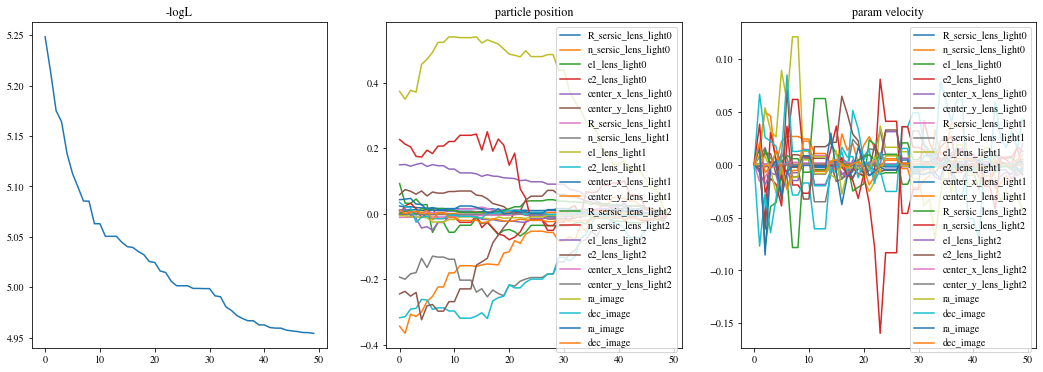

<Figure size 432x288 with 0 Axes>

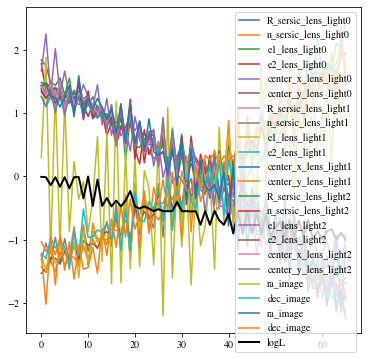

-10.399829919605054 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  10.399829919605057


/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:43: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:101: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:136: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,
/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:533: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data - model), origin='lower', vmin=v_min, vmax=v_max,


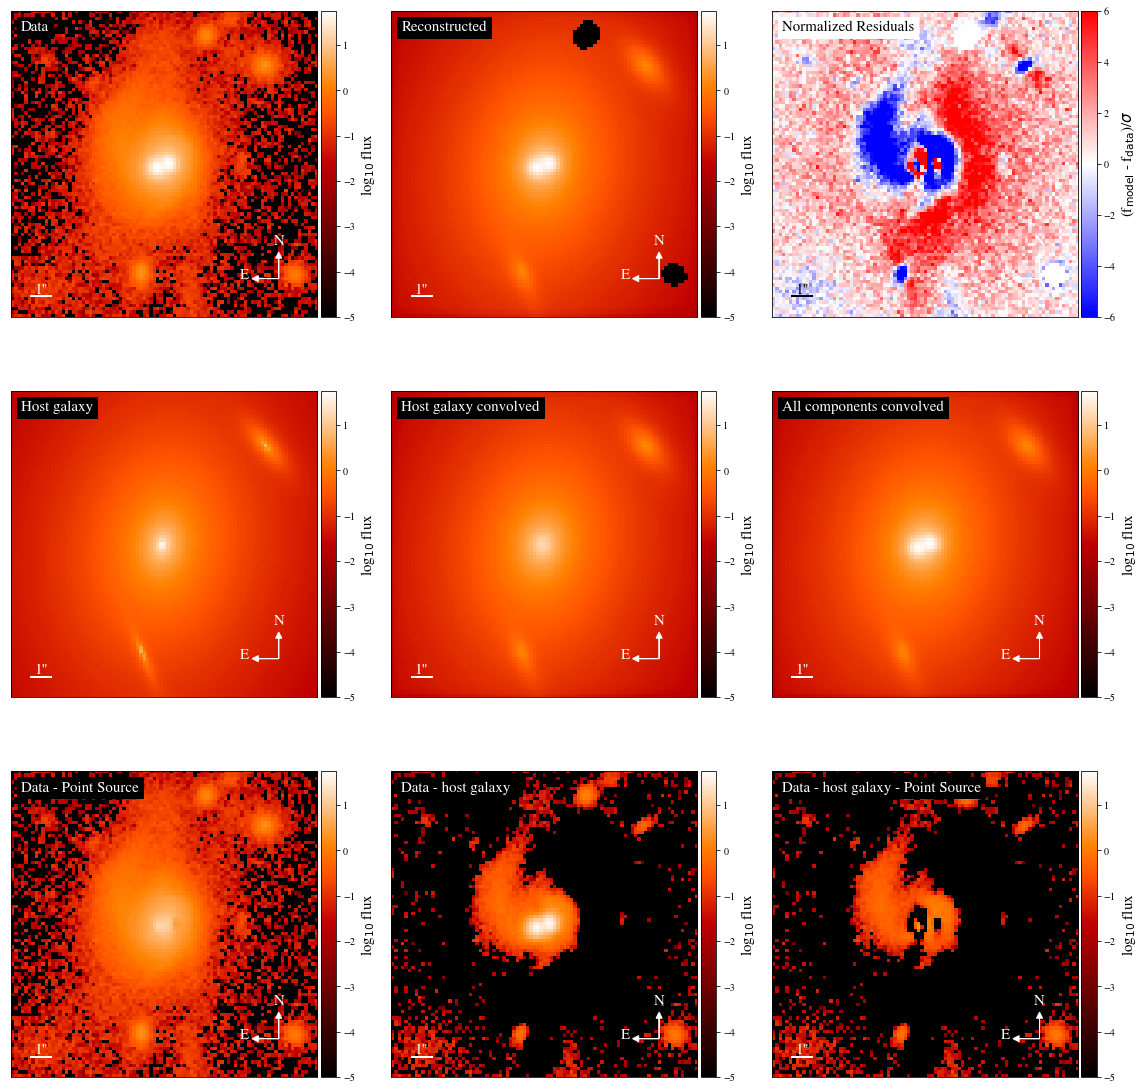

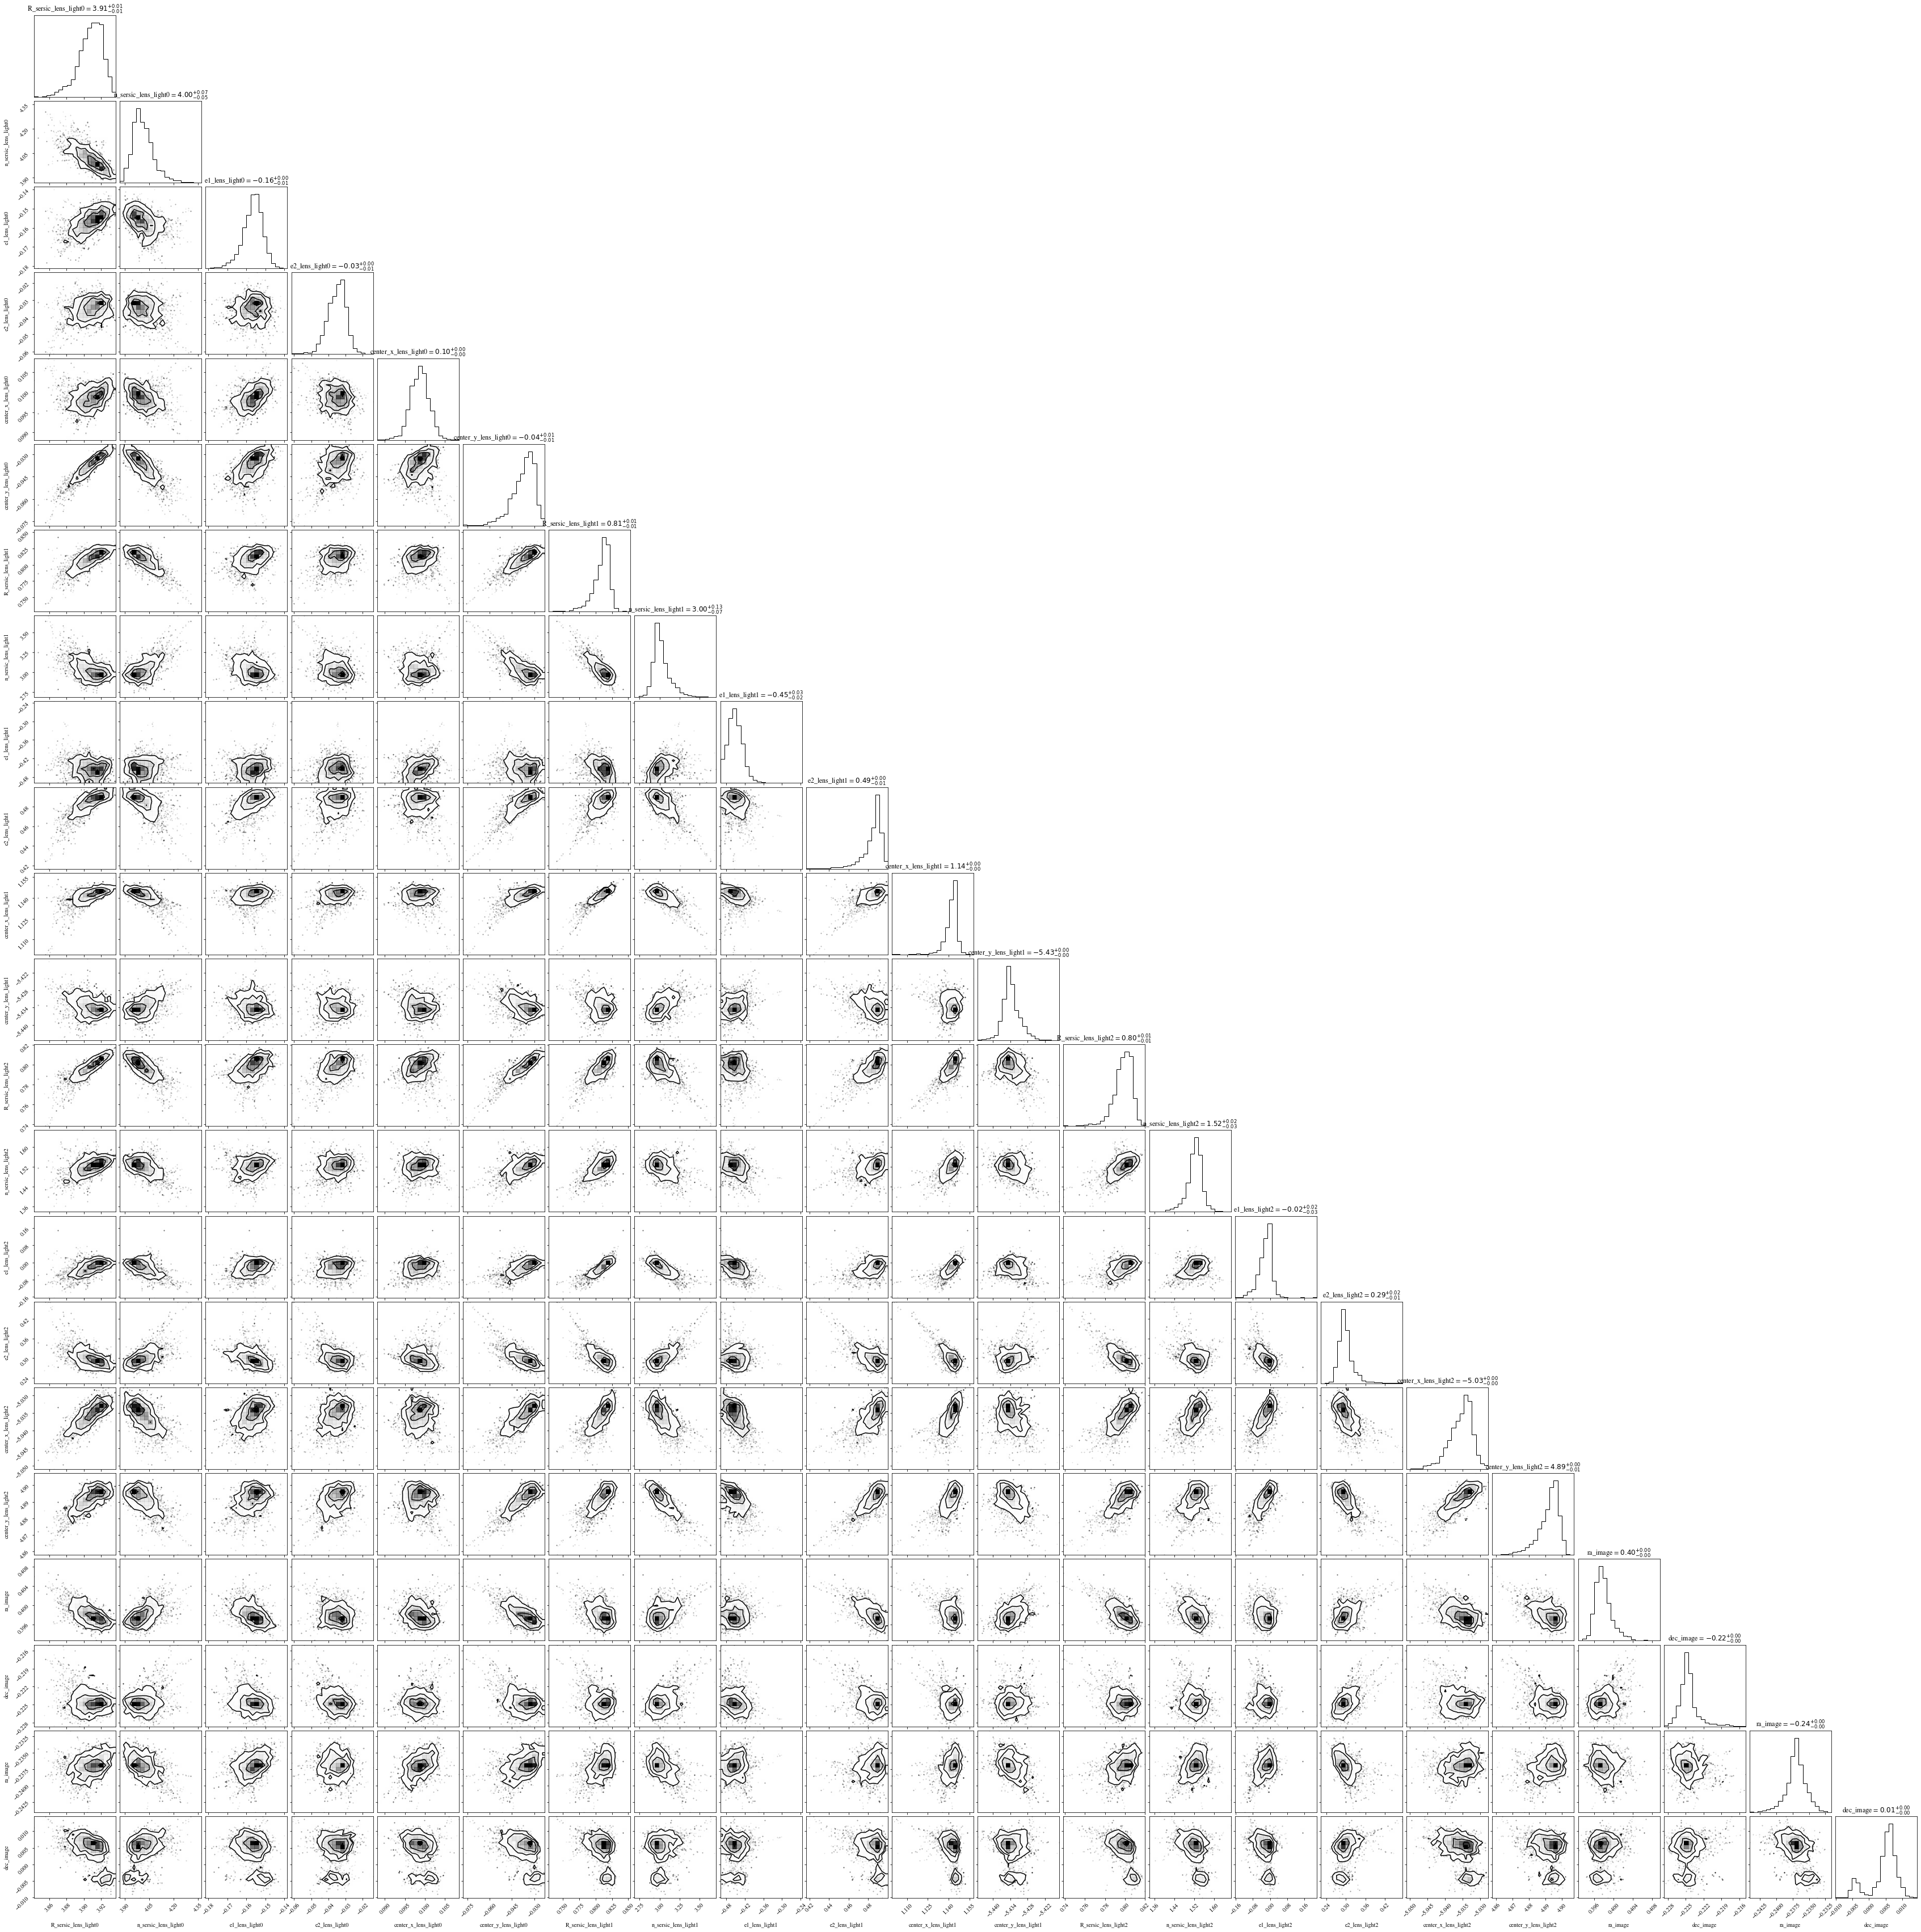

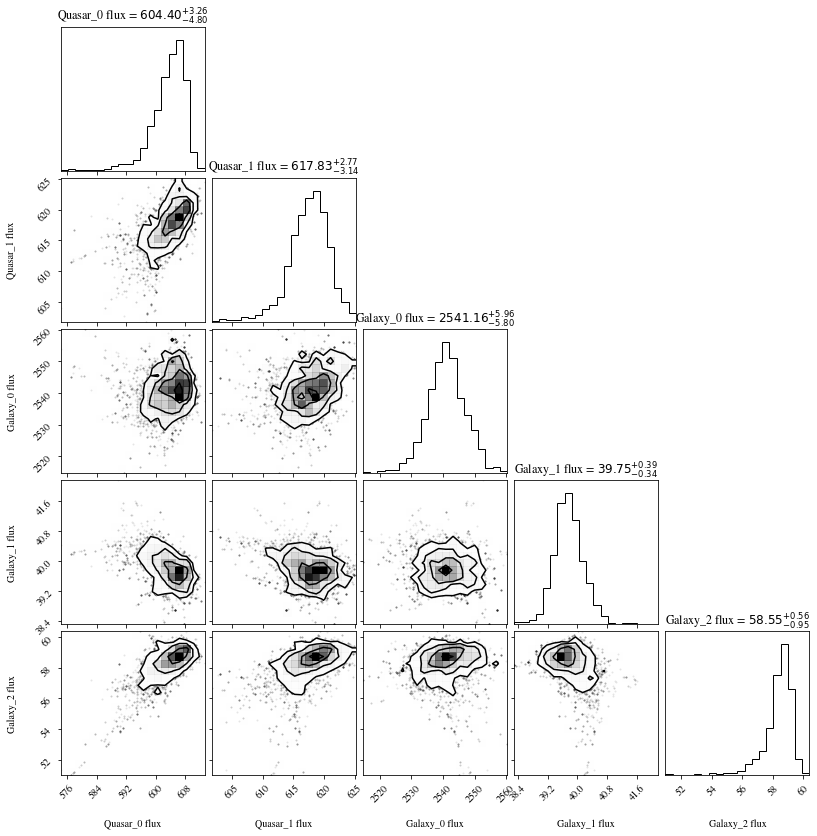

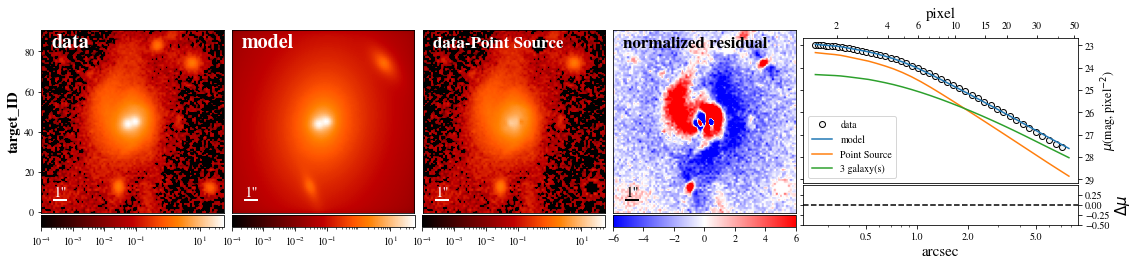

In [4]:
#%%Setting the fitting method and run.
from galight.fitting_process import FittingProcess
fit_run = FittingProcess(fit_sepc, savename = 'HSC_dualAGN')
fit_run.run()
fit_run.plot_all()
fit_run.dump_result()


In [5]:
#Load the saved fitting class, the fitting_run_result would be the loaded as fit_run() in previous fittings.
import pickle
picklename = 'HSC_dualAGN.pkl'
fitting_run_result = pickle.load(open(picklename,'rb'))
#fitting_run_result.plot_final_qso_fit()
fitting_run_result.final_result_galaxy

[{'amp': 13.78537325001168,
  'R_sersic': 3.87181946973566,
  'n_sersic': 4.190598328830918,
  'e1': -0.15572577089301437,
  'e2': -0.046999539128665,
  'center_x': 0.10042644223924495,
  'center_y': -0.06319885793050656,
  'phi_G': -1.4242382326552865,
  'q': 0.7201879068553676,
  'flux_sersic_model': 3449.922446160883,
  'flux_within_frame': 2551.2685613146164,
  'magnitude': 18.483109556574355},
 {'amp': 18.260431081493596,
  'R_sersic': 0.7644783743900426,
  'n_sersic': 3.4712886455861582,
  'e1': -0.48660587203029027,
  'e2': 0.44450611020087893,
  'center_x': 1.1159652192214162,
  'center_y': -5.427101884048511,
  'phi_G': 1.2006891077697335,
  'q': 0.20549591696014494,
  'flux_sersic_model': 46.42688598437067,
  'flux_within_frame': 40.10790408454324,
  'magnitude': 22.99192508079135},
 {'amp': 15.75102378689666,
  'R_sersic': 0.758349888757505,
  'n_sersic': 1.49595645547429,
  'e1': -0.08166786781307944,
  'e2': 0.42136902318571257,
  'center_x': -5.040220744763783,
  'center_